# Part 2: Data cleaning and analysis

This notebook is divided into two parts. First, I will do some data cleaning and reshaping such that I end up with one dataset wich I can use for the machine learning in part 3. This one dataset will contain all the important parameters (or columns) from each of the seperate datasets created in part 1 (MVP, players and team). Seconddly, I will do some analysis of the data to gain some insights about the data that I'm working with.

In short, I will:

* Clean the data using Pandas and NumPy
* Handle issues like missing values and inconsistent data types
* Analyze and visualize data using the matplotlib library

## Part 2a: Data cleaning

In [198]:
import pandas as pd

I will start by removing unnecessary columns from the MVPs dataset by choosing the columns that are relevant. These are: ["Player", "Year", "Pts Won", "Pts Max", "Share"]. "Player" and "Year" will be used to merge the players and MVPs datasets, while "Pts Won", "Pts Max" and "Share" contain the relevant data about the MVP voting. 

In [199]:
mvps = pd.read_csv("./mvps.csv")

In [200]:
mvps = mvps[["Player", "Year", "Pts Won", "Pts Max", "Share"]]

In [201]:
mvps.head()

,Player,Year,Pts Won,Pts Max,Share
0,Michael Jordan,1991,891.0,960,0.928
1,Magic Johnson,1991,497.0,960,0.518
2,David Robinson,1991,476.0,960,0.496
3,Charles Barkley,1991,222.0,960,0.231
4,Karl Malone,1991,142.0,960,0.148


Remove unnecessary columns from players by using delete function.

In [202]:
players = pd.read_csv("./players.csv")

In [203]:
players.head()

,Unnamed: 0,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,0,1,Alaa Abdelnaby,PF,22,POR,43,0,6.7,1.3,...,0.6,1.4,2.1,0.3,0.1,0.3,0.5,0.9,3.1,1991
1,1,2,Mahmoud Abdul-Rauf,PG,21,DEN,67,19,22.5,6.2,...,0.5,1.3,1.8,3.1,0.8,0.1,1.6,2.2,14.1,1991
2,2,3,Mark Acres,C,28,ORL,68,0,19.3,1.6,...,2.1,3.2,5.3,0.4,0.4,0.4,0.6,3.2,4.2,1991
3,3,4,Michael Adams,PG,28,DEN,66,66,35.5,8.5,...,0.9,3.0,3.9,10.5,2.2,0.1,3.6,2.5,26.5,1991
4,4,5,Mark Aguirre,SF,31,DET,78,13,25.7,5.4,...,1.7,3.1,4.8,1.8,0.6,0.3,1.6,2.7,14.2,1991


In [204]:
del players["Unnamed: 0"]
del players["Rk"]

In [205]:
players.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,Alaa Abdelnaby,PF,22,POR,43,0,6.7,1.3,2.7,.474,...,0.6,1.4,2.1,0.3,0.1,0.3,0.5,0.9,3.1,1991
1,Mahmoud Abdul-Rauf,PG,21,DEN,67,19,22.5,6.2,15.1,.413,...,0.5,1.3,1.8,3.1,0.8,0.1,1.6,2.2,14.1,1991
2,Mark Acres,C,28,ORL,68,0,19.3,1.6,3.1,.509,...,2.1,3.2,5.3,0.4,0.4,0.4,0.6,3.2,4.2,1991
3,Michael Adams,PG,28,DEN,66,66,35.5,8.5,21.5,.394,...,0.9,3.0,3.9,10.5,2.2,0.1,3.6,2.5,26.5,1991
4,Mark Aguirre,SF,31,DET,78,13,25.7,5.4,11.7,.462,...,1.7,3.1,4.8,1.8,0.6,0.3,1.6,2.7,14.2,1991


I noticed that some player names in players contain an asterix. This will be a problem when I want to combine the two datasets, MVPs and players, because I´m going to join them on player name and year.

In [206]:
players["Player"].head(50)

0         Alaa Abdelnaby
1     Mahmoud Abdul-Rauf
2             Mark Acres
3          Michael Adams
4           Mark Aguirre
5            Danny Ainge
6            Mark Alarie
7           Steve Alford
8          Greg Anderson
9          Greg Anderson
10         Greg Anderson
11         Greg Anderson
12         Nick Anderson
13          Ron Anderson
14       Willie Anderson
15        Michael Ansley
16        B.J. Armstrong
17         Vincent Askew
18          Keith Askins
19           Miloš Babić
20          Thurl Bailey
21           Cedric Ball
22         Ken Bannister
23      Charles Barkley*
24           Dana Barros
25           John Battle
26          Kenny Battle
27          Kenny Battle
28          Kenny Battle
29       William Bedford
30       Benoit Benjamin
31       Benoit Benjamin
32       Benoit Benjamin
33       Winston Bennett
34           Larry Bird*
35      Rolando Blackman
36          Lance Blanks
37       Mookie Blaylock
38         Muggsy Bogues
39            Manute Bol


`str.replace` replaces the given string (player names) in the parameter Player (type array). Because the asterix is used in regular expression I need the specify that it should not use regex when running the command.

In [207]:
players["Player"] = players["Player"].str.replace("*", "", regex = False)

In [208]:
players.head(50)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,Alaa Abdelnaby,PF,22,POR,43,0,6.7,1.3,2.7,.474,...,0.6,1.4,2.1,0.3,0.1,0.3,0.5,0.9,3.1,1991
1,Mahmoud Abdul-Rauf,PG,21,DEN,67,19,22.5,6.2,15.1,.413,...,0.5,1.3,1.8,3.1,0.8,0.1,1.6,2.2,14.1,1991
2,Mark Acres,C,28,ORL,68,0,19.3,1.6,3.1,.509,...,2.1,3.2,5.3,0.4,0.4,0.4,0.6,3.2,4.2,1991
3,Michael Adams,PG,28,DEN,66,66,35.5,8.5,21.5,.394,...,0.9,3.0,3.9,10.5,2.2,0.1,3.6,2.5,26.5,1991
4,Mark Aguirre,SF,31,DET,78,13,25.7,5.4,11.7,.462,...,1.7,3.1,4.8,1.8,0.6,0.3,1.6,2.7,14.2,1991
5,Danny Ainge,SG,31,POR,80,0,21.4,4.2,8.9,.472,...,0.6,2.0,2.6,3.6,0.8,0.2,1.3,2.4,11.1,1991
6,Mark Alarie,PF,27,WSB,42,1,14.0,2.4,5.4,.440,...,1.0,1.8,2.8,1.1,0.4,0.2,1.0,2.1,5.8,1991
7,Steve Alford,PG,26,DAL,34,0,6.9,1.7,3.4,.504,...,0.3,0.4,0.7,0.6,0.2,0.0,0.5,0.3,4.4,1991
8,Greg Anderson,PF,26,TOT,68,2,13.6,1.7,4.0,.430,...,1.4,3.3,4.7,0.2,0.5,0.7,1.2,2.1,4.3,1991
9,Greg Anderson,PF,26,MIL,26,0,9.5,1.0,2.8,.370,...,1.0,1.9,2.9,0.1,0.3,0.3,0.8,1.1,2.7,1991


### Removing multiple rows for one player and one year
Some players have multiple rows for a given season (for example Greg Anderson). This is because they have changed team during the season. In these cases, basketball-reference have added a total row combining wich summarizes all the seasons stats for that player into one row. Because I only want the total point, assists, etc. for that one season, I will only use this row. This row, containing the total number of points, assits, etc, is the first row for each year for these players (having switched teams during the season), having team (column name: Tm) equal to "TOT".

I'm using the `groupby` function to display this.

In [209]:
players.groupby(["Player", "Year"])
players

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,Alaa Abdelnaby,PF,22,POR,43,0,6.7,1.3,2.7,.474,...,0.6,1.4,2.1,0.3,0.1,0.3,0.5,0.9,3.1,1991
1,Mahmoud Abdul-Rauf,PG,21,DEN,67,19,22.5,6.2,15.1,.413,...,0.5,1.3,1.8,3.1,0.8,0.1,1.6,2.2,14.1,1991
2,Mark Acres,C,28,ORL,68,0,19.3,1.6,3.1,.509,...,2.1,3.2,5.3,0.4,0.4,0.4,0.6,3.2,4.2,1991
3,Michael Adams,PG,28,DEN,66,66,35.5,8.5,21.5,.394,...,0.9,3.0,3.9,10.5,2.2,0.1,3.6,2.5,26.5,1991
4,Mark Aguirre,SF,31,DET,78,13,25.7,5.4,11.7,.462,...,1.7,3.1,4.8,1.8,0.6,0.3,1.6,2.7,14.2,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19584,Thaddeus Young,PF,34,TOR,54,9,14.7,2.0,3.7,.545,...,1.3,1.8,3.1,1.4,1.0,0.1,0.8,1.6,4.4,2023
19585,Trae Young,PG,24,ATL,73,73,34.8,8.2,19.0,.429,...,0.8,2.2,3.0,10.2,1.1,0.1,4.1,1.4,26.2,2023
19586,Omer Yurtseven,C,24,MIA,9,0,9.2,1.8,3.0,.593,...,0.9,1.7,2.6,0.2,0.2,0.2,0.4,1.8,4.4,2023
19587,Cody Zeller,C,30,MIA,15,2,14.5,2.5,3.9,.627,...,1.7,2.6,4.3,0.7,0.2,0.3,0.9,2.2,6.5,2023


In [210]:
players.groupby(["Player", "Year"]).get_group(("Greg Anderson", 1991))

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
8,Greg Anderson,PF,26,TOT,68,2,13.6,1.7,4.0,.430,...,1.4,3.3,4.7,0.2,0.5,0.7,1.2,2.1,4.3,1991
9,Greg Anderson,PF,26,MIL,26,0,9.5,1.0,2.8,.370,...,1.0,1.9,2.9,0.1,0.3,0.3,0.8,1.1,2.7,1991
10,Greg Anderson,PF,26,NJN,1,0,18.0,4.0,4.0,1.000,...,4.0,2.0,6.0,1.0,2.0,0.0,1.0,4.0,8.0,1991
11,Greg Anderson,PF,26,DEN,41,2,16.1,2.1,4.7,.440,...,1.6,4.1,5.8,0.3,0.6,0.9,1.5,2.6,5.2,1991


To get the first row in each of these groups, I will create a function that checks the shape of the dataframe. If the dataframe contains more than one row, I will return the row having team name equal to "TOT".

Then, I will apply this function to `groupby` function I displayed above.

In [211]:
def single_row(df):
    if df.shape[0]==1: # Each player that has only one row in the group just gets passed by
        return df
    else:
        row = df[df["Tm"] == "TOT"] # The players that have more than a row, will return the row where Tm = TOT 
        row["Tm"] = df.iloc[-1,:]["Tm"] # Here, we change the team name from TOT to the last team that player played for that year (which is the last row in the group).
        return row

In [212]:
players_clean = players.groupby(["Player", "Year"]).apply(single_row)

In [213]:
players_clean.head(20)

Player Pos Age   Tm   G  GS    MP   FG   FGA  \
Player        Year                                                              
A.C. Green    1991 164       A.C. Green  PF  27  LAL  82  21  26.4  3.1   6.6   
              1992 633       A.C. Green  PF  28  LAL  82  53  35.4  4.7   9.8   
              1993 1092      A.C. Green  PF  29  LAL  82  55  34.4  4.6   8.6   
              1994 1579      A.C. Green  PF  30  PHO  82  55  34.5  5.7  11.3   
              1995 2067      A.C. Green  SF  31  PHO  82  52  32.8  3.8   7.5   
              1996 2563      A.C. Green  SF  32  PHO  82  36  25.8  2.6   5.4   
              1997 3138      A.C. Green  PF  33  DAL  83  73  30.0  2.8   5.8   
              1998 3725      A.C. Green  PF  34  DAL  82  68  32.3  3.0   6.5   
              1999 4283      A.C. Green  PF  35  DAL  50  35  18.5  2.2   5.1   
              2000 4811      A.C. Green  PF  36  LAL  82  82  23.5  2.1   4.7   
              2001 5330      A.C. Green  PF  37  MIA  82   1  17.2  1.8   4.0   
A.J. Bramlett 2000 4684   A.J. Bramlett   C  23  CLE   8   0   7.6  0.5   2.6   
A.J. English  1991 127     A.J. English  SG  23  WSB  70  12  20.6  3.6   8.2   
              1992 597     A.J. English  SG  24  WSB  81   6  20.6  4.5  10.4   
A.J. Green    2023 19115     A.J. Green  SG  23  MIL  35   1   9.9  1.5   3.6   
A.J. Guyton   2001 5333     A.J. Guyton  PG  22  CHI  33   8  19.1  2.4   5.8   
              2002 5886     A.J. Guyton  PG  23  CHI  45   6  13.5  2.0   5.4   
              2003 6393     A.J. Guyton  PG  24  GSW   2   0   4.5  0.0   2.0   
A.J. Hammons  2017 14814   A.J. Hammons   C  24  DAL  22   0   7.4  0.8   1.9   
A.J. Lawson   2023 19259    A.J. Lawson  SG  22  DAL  15   0   7.2  1.5   2.9   

                           FG%  ...  ORB  DRB  TRB  AST  STL  BLK  TOV   PF  \
Player        Year              ...                                           
A.C. Green    1991 164    .476  ...  2.5  3.8  6.3  0.9  0.7  0.3  1.2  1.4   
              1992 633    .476  ...  3.7  5.6  9.3  1.4  1.1  0.4  1.4  1.7   
              1993 1092   .537  ...  3.5  5.2  8.7  1.4  1.1  0.5  1.4  1.8   
              1994 1579   .502  ...  3.4  5.8  9.2  1.7  0.9  0.5  1.2  1.7   
              1995 2067   .504  ...  2.4  5.8  8.2  1.5  0.7  0.4  1.4  1.8   
              1996 2563   .484  ...  2.0  4.7  6.8  0.9  0.5  0.3  1.0  1.7   
              1997 3138   .483  ...  2.7  5.2  7.9  0.8  0.8  0.2  0.9  1.7   
              1998 3725   .453  ...  2.7  5.5  8.1  1.5  1.0  0.3  0.8  1.9   
              1999 4283   .422  ...  1.6  2.9  4.6  0.5  0.6  0.2  0.4  1.4   
              2000 4811   .447  ...  2.0  4.0  5.9  1.0  0.6  0.2  0.6  1.5   
              2001 5330   .444  ...  1.3  2.5  3.8  0.5  0.4  0.1  0.5  1.5   
A.J. Bramlett 2000 4684   .190  ...  1.5  1.3  2.8  0.0  0.1  0.0  0.4  1.6   
A.J. English  1991 127    .439  ...  0.9  1.2  2.1  2.5  0.4  0.2  1.6  1.8   
              1992 597    .433  ...  0.9  1.2  2.1  1.8  0.4  0.1  1.1  2.0   
A.J. Green    2023 19115  .424  ...  0.2  1.1  1.3  0.6  0.2  0.0  0.3  0.9   
A.J. Guyton   2001 5333   .406  ...  0.3  0.8  1.1  1.9  0.3  0.2  0.7  1.1   
              2002 5886   .361  ...  0.3  0.7  1.0  1.8  0.2  0.2  0.8  0.5   
              2003 6393   .000  ...  0.0  0.0  0.0  1.0  0.5  0.0  0.5  0.0   
A.J. Hammons  2017 14814  .405  ...  0.4  1.3  1.6  0.2  0.0  0.6  0.5  1.0   
A.J. Lawson   2023 19259  .500  ...  0.4  1.0  1.4  0.1  0.1  0.0  0.2  0.7   

                           PTS  Year  
Player        Year                    
A.C. Green    1991 164     9.1  1991  
              1992 633    13.6  1992  
              1993 1092   12.8  1993  
              1994 1579   14.7  1994  
              1995 2067   11.2  1995  
              1996 2563    7.5  1996  
              1997 3138    7.2  1997  
              1998 3725    7.3  1998  
              1999 4283    4.9  1999  
              2000 4811    5.0  2000  
              2001 5330    4.5  2001  
A.J.

This created a multi-level index inside the dataframe. Because I do not want these, I will drop them.

First, the first level ...

In [214]:
players_clean.index = players_clean.index.droplevel()

In [215]:
players_clean

,,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
Year,,,,,,,,,,,,,,,,,,,,,,
1991,164,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,.476,...,2.5,3.8,6.3,0.9,0.7,0.3,1.2,1.4,9.1,1991
1992,633,A.C. Green,PF,28,LAL,82,53,35.4,4.7,9.8,.476,...,3.7,5.6,9.3,1.4,1.1,0.4,1.4,1.7,13.6,1992
1993,1092,A.C. Green,PF,29,LAL,82,55,34.4,4.6,8.6,.537,...,3.5,5.2,8.7,1.4,1.1,0.5,1.4,1.8,12.8,1993
1994,1579,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,.502,...,3.4,5.8,9.2,1.7,0.9,0.5,1.2,1.7,14.7,1994
1995,2067,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,.504,...,2.4,5.8,8.2,1.5,0.7,0.4,1.4,1.8,11.2,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,6095,Željko Rebrača,C,29,DET,74,4,15.9,2.6,5.1,.505,...,1.1,2.8,3.9,0.5,0.4,1.0,1.1,2.6,6.9,2002
2003,6595,Željko Rebrača,C,30,DET,30,12,16.3,2.7,4.8,.552,...,0.9,2.2,3.1,0.3,0.2,0.6,1.0,2.6,6.6,2003
2004,7176,Željko Rebrača,C,31,ATL,24,2,11.4,1.4,3.2,.442,...,1.0,1.5,2.4,0.3,0.2,0.5,0.7,2.2,3.8,2004


... and then, the second:

In [216]:
players_clean.index = players_clean.index.droplevel()

In [217]:
players_clean

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
164,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,.476,...,2.5,3.8,6.3,0.9,0.7,0.3,1.2,1.4,9.1,1991
633,A.C. Green,PF,28,LAL,82,53,35.4,4.7,9.8,.476,...,3.7,5.6,9.3,1.4,1.1,0.4,1.4,1.7,13.6,1992
1092,A.C. Green,PF,29,LAL,82,55,34.4,4.6,8.6,.537,...,3.5,5.2,8.7,1.4,1.1,0.5,1.4,1.8,12.8,1993
1579,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,.502,...,3.4,5.8,9.2,1.7,0.9,0.5,1.2,1.7,14.7,1994
2067,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,.504,...,2.4,5.8,8.2,1.5,0.7,0.4,1.4,1.8,11.2,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6095,Željko Rebrača,C,29,DET,74,4,15.9,2.6,5.1,.505,...,1.1,2.8,3.9,0.5,0.4,1.0,1.1,2.6,6.9,2002
6595,Željko Rebrača,C,30,DET,30,12,16.3,2.7,4.8,.552,...,0.9,2.2,3.1,0.3,0.2,0.6,1.0,2.6,6.6,2003
7176,Željko Rebrača,C,31,ATL,24,2,11.4,1.4,3.2,.442,...,1.0,1.5,2.4,0.3,0.2,0.5,0.7,2.2,3.8,2004
7776,Željko Rebrača,C,32,LAC,58,2,16.0,2.3,4.0,.568,...,0.8,2.3,3.2,0.4,0.2,0.7,0.8,2.2,5.8,2005


Now the dataframe contains one row for each player for each year.

In [218]:
players_clean[players_clean["Player"] == "Greg Anderson"]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
8,Greg Anderson,PF,26,DEN,68,2,13.6,1.7,4.0,.430,...,1.4,3.3,4.7,0.2,0.5,0.7,1.2,2.1,4.3,1991
467,Greg Anderson,PF,27,DEN,82,82,34.1,4.7,10.4,.456,...,4.1,7.4,11.5,1.0,1.1,0.8,2.5,3.2,11.5,1992
1412,Greg Anderson,PF,29,DET,77,47,21.1,2.6,4.8,.543,...,2.4,5.0,7.4,0.7,0.7,0.9,1.2,3.0,6.4,1994
1911,Greg Anderson,PF,30,ATL,51,0,12.2,1.1,2.0,.548,...,1.2,2.5,3.7,0.3,0.5,0.6,0.6,2.0,2.9,1995
2381,Greg Anderson,PF,31,SAS,46,7,7.5,0.5,1.0,.511,...,0.6,1.5,2.2,0.2,0.2,0.5,0.5,1.4,1.2,1996
2948,Greg Anderson,C,32,SAS,82,48,20.2,1.6,3.2,.496,...,1.9,3.5,5.5,0.4,0.8,0.8,0.9,2.7,3.9,1997
3541,Greg Anderson,C,33,ATL,50,0,8.0,0.7,1.6,.444,...,0.8,1.6,2.4,0.3,0.4,0.2,0.3,1.7,1.8,1998


### Merging players and MVPs datasets

I will be using the `merge` function with the "outer" condition, because there only a few players in the Players dataframe that are in the MVPs dataframe (players that have actually got votes in the MVP voting). Players that did not get MVP votes will get NaN values in the columns from the MVPs dataframe.

I will join the two dataframes on the columns "Player" and "Year". The columns "Pts Won", "Pts Max" and "Share" contain the amount of votes each player got that specific season.

In [219]:
combined = players_clean.merge(mvps, how = "outer", on = ["Player", "Year"])

In [220]:
combined.head(5)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
0,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,.476,...,0.9,0.7,0.3,1.2,1.4,9.1,1991,NaN,NaN,NaN
1,A.C. Green,PF,28,LAL,82,53,35.4,4.7,9.8,.476,...,1.4,1.1,0.4,1.4,1.7,13.6,1992,NaN,NaN,NaN
2,A.C. Green,PF,29,LAL,82,55,34.4,4.6,8.6,.537,...,1.4,1.1,0.5,1.4,1.8,12.8,1993,NaN,NaN,NaN
3,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,.502,...,1.7,0.9,0.5,1.2,1.7,14.7,1994,NaN,NaN,NaN
4,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,.504,...,1.5,0.7,0.4,1.4,1.8,11.2,1995,NaN,NaN,NaN


Check if the players that did get votes actually have data in their MVPs columns:

In [221]:
combined[combined["Pts Won"] > 0]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
206,Al Jefferson,C,29,CHA,73,73,35.0,9.6,18.8,.509,...,2.1,0.9,1.1,1.7,2.4,21.8,2014,34.0,1250.0,0.027
360,Allen Iverson,PG,21,PHI,76,74,40.1,8.2,19.8,.416,...,7.5,2.1,0.3,4.4,3.1,23.5,1997,1.0,1150.0,0.001
362,Allen Iverson,SG,23,PHI,48,48,41.5,9.1,22.0,.412,...,4.6,2.3,0.1,3.5,2.0,26.8,1999,319.0,1180.0,0.270
363,Allen Iverson,SG,24,PHI,70,70,40.8,10.4,24.8,.421,...,4.7,2.1,0.1,3.3,2.3,28.4,2000,132.0,1210.0,0.109
364,Allen Iverson,SG,25,PHI,71,71,42.0,10.7,25.5,.420,...,4.6,2.5,0.3,3.3,2.1,31.1,2001,1121.0,1240.0,0.904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14689,Vince Carter,SF,23,TOR,82,82,38.1,9.6,20.7,.465,...,3.9,1.3,1.1,2.2,3.2,25.7,2000,51.0,1210.0,0.042
14690,Vince Carter,SF,24,TOR,75,75,39.7,10.2,22.1,.460,...,3.9,1.5,1.1,2.2,2.7,27.6,2001,7.0,1240.0,0.006
14694,Vince Carter,SF-SG,28,NJN,77,76,36.7,9.0,20.0,.452,...,4.2,1.4,0.6,2.2,3.2,24.5,2005,3.0,1270.0,0.002
15082,Yao Ming,C,23,HOU,82,82,32.8,6.5,12.5,.522,...,1.5,0.3,1.9,2.5,3.3,17.5,2004,1.0,1230.0,0.001


Replace the NaN values with zeros.

In [222]:
combined[["Pts Won", "Pts Max", "Share"]] = combined[["Pts Won", "Pts Max", "Share"]].fillna(0)

In [223]:
combined

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
0,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,.476,...,0.9,0.7,0.3,1.2,1.4,9.1,1991,0.0,0.0,0.0
1,A.C. Green,PF,28,LAL,82,53,35.4,4.7,9.8,.476,...,1.4,1.1,0.4,1.4,1.7,13.6,1992,0.0,0.0,0.0
2,A.C. Green,PF,29,LAL,82,55,34.4,4.6,8.6,.537,...,1.4,1.1,0.5,1.4,1.8,12.8,1993,0.0,0.0,0.0
3,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,.502,...,1.7,0.9,0.5,1.2,1.7,14.7,1994,0.0,0.0,0.0
4,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,.504,...,1.5,0.7,0.4,1.4,1.8,11.2,1995,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15231,Željko Rebrača,C,29,DET,74,4,15.9,2.6,5.1,.505,...,0.5,0.4,1.0,1.1,2.6,6.9,2002,0.0,0.0,0.0
15232,Željko Rebrača,C,30,DET,30,12,16.3,2.7,4.8,.552,...,0.3,0.2,0.6,1.0,2.6,6.6,2003,0.0,0.0,0.0
15233,Željko Rebrača,C,31,ATL,24,2,11.4,1.4,3.2,.442,...,0.3,0.2,0.5,0.7,2.2,3.8,2004,0.0,0.0,0.0
15234,Željko Rebrača,C,32,LAC,58,2,16.0,2.3,4.0,.568,...,0.4,0.2,0.7,0.8,2.2,5.8,2005,0.0,0.0,0.0


### Cleaning the team dataset

Next, I will take a look at the team dataset.

In [245]:
teams = pd.read_csv("teams.csv")

In [246]:
teams.head(30)

,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,0,56,26,.683,—,111.5,105.7,5.22,1991,Boston Celtics*
1,1,44,38,.537,12.0,105.4,105.6,-0.39,1991,Philadelphia 76ers*
2,2,39,43,.476,17.0,103.1,103.3,-0.43,1991,New York Knicks*
3,3,30,52,.366,26.0,101.4,106.4,-4.84,1991,Washington Bullets
4,4,26,56,.317,30.0,102.9,107.5,-4.53,1991,New Jersey Nets
5,5,24,58,.293,32.0,101.8,107.8,-5.91,1991,Miami Heat
6,6,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,1991,Central Division
7,7,61,21,.744,—,110.0,101.0,8.57,1991,Chicago Bulls*
8,8,50,32,.610,11.0,100.1,96.8,3.08,1991,Detroit Pistons*
9,9,48,34,.585,13.0,106.4,104.0,2.33,1991,Milwaukee Bucks*


The output above shows that there is some data cleaning to do. Firstly, I will remove the rows containing the division title.

In [247]:
teams = teams[~teams["W"].str.contains("Division")] # this returns all rows that do not contain "Division" in the W column

In [248]:
teams.head(30)

,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,0,56,26,.683,—,111.5,105.7,5.22,1991,Boston Celtics*
1,1,44,38,.537,12.0,105.4,105.6,-0.39,1991,Philadelphia 76ers*
2,2,39,43,.476,17.0,103.1,103.3,-0.43,1991,New York Knicks*
3,3,30,52,.366,26.0,101.4,106.4,-4.84,1991,Washington Bullets
4,4,26,56,.317,30.0,102.9,107.5,-4.53,1991,New Jersey Nets
5,5,24,58,.293,32.0,101.8,107.8,-5.91,1991,Miami Heat
7,7,61,21,.744,—,110.0,101.0,8.57,1991,Chicago Bulls*
8,8,50,32,.610,11.0,100.1,96.8,3.08,1991,Detroit Pistons*
9,9,48,34,.585,13.0,106.4,104.0,2.33,1991,Milwaukee Bucks*
10,10,43,39,.524,18.0,109.8,109.0,0.72,1991,Atlanta Hawks*


Then, I will remove the asterix from the team name.

In [249]:
teams["Team"] = teams["Team"].str.replace("*", "", regex=False)

In [250]:
teams.head(5)

,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,0,56,26,.683,—,111.5,105.7,5.22,1991,Boston Celtics
1,1,44,38,.537,12.0,105.4,105.6,-0.39,1991,Philadelphia 76ers
2,2,39,43,.476,17.0,103.1,103.3,-0.43,1991,New York Knicks
3,3,30,52,.366,26.0,101.4,106.4,-4.84,1991,Washington Bullets
4,4,26,56,.317,30.0,102.9,107.5,-4.53,1991,New Jersey Nets


Looks good!

After doing some more digging, I found that each team for the 2022/23 season have their final divison standing added to their names. This needs also to be removed.

In [255]:
teams["Team"].unique()

array(['Boston Celtics', 'Philadelphia 76ers', 'New York Knicks',
       'Washington Bullets', 'New Jersey Nets', 'Miami Heat',
       'Chicago Bulls', 'Detroit Pistons', 'Milwaukee Bucks',
       'Atlanta Hawks', 'Indiana Pacers', 'Cleveland Cavaliers',
       'Charlotte Hornets', 'San Antonio Spurs', 'Utah Jazz',
       'Houston Rockets', 'Orlando Magic', 'Minnesota Timberwolves',
       'Dallas Mavericks', 'Denver Nuggets', 'Portland Trail Blazers',
       'Los Angeles Lakers', 'Phoenix Suns', 'Golden State Warriors',
       'Seattle SuperSonics', 'Los Angeles Clippers', 'Sacramento Kings',
       'Toronto Raptors', 'Vancouver Grizzlies', 'Washington Wizards',
       'Memphis Grizzlies', 'New Orleans Hornets', 'Charlotte Bobcats',
       'New Orleans/Oklahoma City Hornets', 'Oklahoma City Thunder',
       'Brooklyn Nets', 'New Orleans Pelicans'], dtype=object)

In [251]:
teams.tail(35)

,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
1063,13,56,26,.683,—,115.6,109.9,5.37,2022,Memphis Grizzlies
1064,14,52,30,.634,4.0,108.0,104.7,3.12,2022,Dallas Mavericks
1065,15,36,46,.439,20.0,109.3,110.3,-0.84,2022,New Orleans Pelicans
1066,16,34,48,.415,22.0,113.2,113.0,0.02,2022,San Antonio Spurs
1067,17,20,62,.244,36.0,109.7,118.2,-8.26,2022,Houston Rockets
1068,0,57,25,.695,—,117.9,111.4,6.38,2023,Boston Celtics (2)
1069,1,54,28,.659,3.0,115.2,110.9,4.37,2023,Philadelphia 76ers (3)
1070,2,47,35,.573,10.0,116.0,113.1,2.99,2023,New York Knicks (5)
1071,3,45,37,.549,12.0,113.4,112.5,1.03,2023,Brooklyn Nets (6)
1072,4,41,41,.500,16.0,112.9,111.4,1.59,2023,Toronto Raptors (9)


This time I used regex to remove the parts I did not want.

In [252]:
teams["Team"] = teams["Team"].str.replace(r"\s\([0-9]+\)", "", regex=True) 

In [253]:
teams.tail(35)

,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
1063,13,56,26,.683,—,115.6,109.9,5.37,2022,Memphis Grizzlies
1064,14,52,30,.634,4.0,108.0,104.7,3.12,2022,Dallas Mavericks
1065,15,36,46,.439,20.0,109.3,110.3,-0.84,2022,New Orleans Pelicans
1066,16,34,48,.415,22.0,113.2,113.0,0.02,2022,San Antonio Spurs
1067,17,20,62,.244,36.0,109.7,118.2,-8.26,2022,Houston Rockets
1068,0,57,25,.695,—,117.9,111.4,6.38,2023,Boston Celtics
1069,1,54,28,.659,3.0,115.2,110.9,4.37,2023,Philadelphia 76ers
1070,2,47,35,.573,10.0,116.0,113.1,2.99,2023,New York Knicks
1071,3,45,37,.549,12.0,113.4,112.5,1.03,2023,Brooklyn Nets
1072,4,41,41,.500,16.0,112.9,111.4,1.59,2023,Toronto Raptors


### Fixing the team names
In the teams dataframe the full team name is used, while in the combined dataframe the short version of the team name is used, as seen below.

This will cause a problem, because I'm going to merge the two dataframes on the team name.

In [256]:
teams["Team"].unique()

array(['Boston Celtics', 'Philadelphia 76ers', 'New York Knicks',
       'Washington Bullets', 'New Jersey Nets', 'Miami Heat',
       'Chicago Bulls', 'Detroit Pistons', 'Milwaukee Bucks',
       'Atlanta Hawks', 'Indiana Pacers', 'Cleveland Cavaliers',
       'Charlotte Hornets', 'San Antonio Spurs', 'Utah Jazz',
       'Houston Rockets', 'Orlando Magic', 'Minnesota Timberwolves',
       'Dallas Mavericks', 'Denver Nuggets', 'Portland Trail Blazers',
       'Los Angeles Lakers', 'Phoenix Suns', 'Golden State Warriors',
       'Seattle SuperSonics', 'Los Angeles Clippers', 'Sacramento Kings',
       'Toronto Raptors', 'Vancouver Grizzlies', 'Washington Wizards',
       'Memphis Grizzlies', 'New Orleans Hornets', 'Charlotte Bobcats',
       'New Orleans/Oklahoma City Hornets', 'Oklahoma City Thunder',
       'Brooklyn Nets', 'New Orleans Pelicans'], dtype=object)

In [257]:
combined["Tm"].unique()

array(['LAL', 'PHO', 'DAL', 'MIA', 'CLE', 'WSB', 'MIL', 'CHI', 'GSW',
       'IND', 'WAS', 'MIN', 'BOS', 'ATL', 'HOU', 'DEN', 'ORL', 'NOH',
       'TOR', 'SAC', 'CHO', 'PHI', 'POR', 'DET', 'OKC', 'UTA', 'VAN',
       'SEA', 'NJN', 'NOK', 'LAC', 'CHA', 'MEM', 'NYK', 'NOP', 'BRK',
       'SAS', 'CHH'], dtype=object)

Therefore, I have to map the team nicknames to the full team name for each team. To achieve this, I will use a premade csv-file containing this mapping. It´s called "nicknames_nba_teams". I will use this file to create a dictionary which I can then use to map the short team name to the long team name.

I will start off by taking a look at how the csv-file looks when I read it in.

In [258]:
nicknames = {}

with open("nicknames_nba_teams.csv") as f:
    lines = f.readlines()

In [259]:
lines

['Abbreviation,Name\n',
 'ATL,Atlanta Hawks\n',
 'BRK,Brooklyn Nets\n',
 'BKN,Brooklyn Nets\n',
 'BOS,Boston Celtics\n',
 'CHA,Charlotte Bobcats\n',
 'CHH,Charlotte Hornets\n',
 'CHO,Charlotte Hornets\n',
 'CHI,Chicago Bulls\n',
 'CLE,Cleveland Cavaliers\n',
 'DAL,Dallas Mavericks\n',
 'DEN,Denver Nuggets\n',
 'DET,Detroit Pistons\n',
 'GSW,Golden State Warriors\n',
 'HOU,Houston Rockets\n',
 'IND,Indiana Pacers\n',
 'LAC,Los Angeles Clippers\n',
 'LAL,Los Angeles Lakers\n',
 'MEM,Memphis Grizzlies\n',
 'MIA,Miami Heat\n',
 'MIL,Milwaukee Bucks\n',
 'MIN,Minnesota Timberwolves\n',
 'NJN,New Jersey Nets\n',
 'NOH,New Orleans Hornets\n',
 'NOP,New Orleans Pelicans\n',
 'NOK,New Orleans/Oklahoma City Hornets\n',
 'NYK,New York Knicks\n',
 'OKC,Oklahoma City Thunder\n',
 'ORL,Orlando Magic\n',
 'PHI,Philadelphia 76ers\n',
 'PHX,Phoenix Suns\n',
 'PHO,Phoenix Suns\n',
 'POR,Portland Trail Blazers\n',
 'SEA,Seattle SuperSonics\n',
 'SAC,Sacramento Kings\n',
 'SAS,San Antonio Spurs\n',
 'TOR,

Then, I will remove the escape sign "\n" and split the abbreviation and full name, assigning the abbreviation to be the key and the name to be the value in the dictionary.

In [260]:
nicknames = {}

with open("nicknames_nba_teams.csv") as f:
    lines = f.readlines()
    for line in lines[1:]:
        abbrev,name = line.replace("\n", "").split(",")
        nicknames[abbrev] = name

In [261]:
nicknames

{'ATL': 'Atlanta Hawks',
 'BRK': 'Brooklyn Nets',
 'BKN': 'Brooklyn Nets',
 'BOS': 'Boston Celtics',
 'CHA': 'Charlotte Bobcats',
 'CHH': 'Charlotte Hornets',
 'CHO': 'Charlotte Hornets',
 'CHI': 'Chicago Bulls',
 'CLE': 'Cleveland Cavaliers',
 'DAL': 'Dallas Mavericks',
 'DEN': 'Denver Nuggets',
 'DET': 'Detroit Pistons',
 'GSW': 'Golden State Warriors',
 'HOU': 'Houston Rockets',
 'IND': 'Indiana Pacers',
 'LAC': 'Los Angeles Clippers',
 'LAL': 'Los Angeles Lakers',
 'MEM': 'Memphis Grizzlies',
 'MIA': 'Miami Heat',
 'MIL': 'Milwaukee Bucks',
 'MIN': 'Minnesota Timberwolves',
 'NJN': 'New Jersey Nets',
 'NOH': 'New Orleans Hornets',
 'NOP': 'New Orleans Pelicans',
 'NOK': 'New Orleans/Oklahoma City Hornets',
 'NYK': 'New York Knicks',
 'OKC': 'Oklahoma City Thunder',
 'ORL': 'Orlando Magic',
 'PHI': 'Philadelphia 76ers',
 'PHX': 'Phoenix Suns',
 'PHO': 'Phoenix Suns',
 'POR': 'Portland Trail Blazers',
 'SEA': 'Seattle SuperSonics',
 'SAC': 'Sacramento Kings',
 'SAS': 'San Antonio Spu

Now, I will map the names to the nicknames.

In [262]:
combined["Team"] = combined["Tm"].map(nicknames)

In [263]:
combined.tail(5)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,Team
15231,Željko Rebrača,C,29,DET,74,4,15.9,2.6,5.1,.505,...,0.4,1.0,1.1,2.6,6.9,2002,0.0,0.0,0.0,Detroit Pistons
15232,Željko Rebrača,C,30,DET,30,12,16.3,2.7,4.8,.552,...,0.2,0.6,1.0,2.6,6.6,2003,0.0,0.0,0.0,Detroit Pistons
15233,Željko Rebrača,C,31,ATL,24,2,11.4,1.4,3.2,.442,...,0.2,0.5,0.7,2.2,3.8,2004,0.0,0.0,0.0,Atlanta Hawks
15234,Željko Rebrača,C,32,LAC,58,2,16.0,2.3,4.0,.568,...,0.2,0.7,0.8,2.2,5.8,2005,0.0,0.0,0.0,Los Angeles Clippers
15235,Željko Rebrača,C,33,LAC,29,2,14.2,1.8,3.3,.542,...,0.2,0.7,0.8,2.0,4.7,2006,0.0,0.0,0.0,Los Angeles Clippers


### Merging the combined dataset (containing player and MVP stats) and the team dataset

With the combined dataframe containing the full team names for each team (in the column "Team"), I can now merge the teams dataframe with the combined dataframe. I will join the dataframes on the columns "Team" and "Year".

In [264]:
stats = combined.merge(teams, how = "outer", on = ["Team", "Year"])

In [265]:
stats

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Share,Team,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS
0,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,.476,...,0.0,Los Angeles Lakers,10,58,24,.707,5.0,106.3,99.6,6.73
1,Byron Scott,SG,29,LAL,82,82,32.1,6.1,12.8,.477,...,0.0,Los Angeles Lakers,10,58,24,.707,5.0,106.3,99.6,6.73
2,Elden Campbell,PF,22,LAL,52,0,7.3,1.1,2.4,.455,...,0.0,Los Angeles Lakers,10,58,24,.707,5.0,106.3,99.6,6.73
3,Irving Thomas,PF,25,LAL,26,0,4.2,0.7,1.9,.340,...,0.0,Los Angeles Lakers,10,58,24,.707,5.0,106.3,99.6,6.73
4,James Worthy,SF,29,LAL,78,74,38.6,9.2,18.7,.492,...,0.0,Los Angeles Lakers,10,58,24,.707,5.0,106.3,99.6,6.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15231,Spencer Hawes,PF,28,MIL,54,1,14.8,2.5,5.1,.484,...,0.0,Milwaukee Bucks,7,42,40,.512,9.0,103.6,103.8,-0.45
15232,Steve Novak,PF,33,MIL,8,0,2.8,0.3,0.9,.286,...,0.0,Milwaukee Bucks,7,42,40,.512,9.0,103.6,103.8,-0.45
15233,Terrence Jones,PF,25,MIL,54,12,23.5,4.3,9.1,.470,...,0.0,Milwaukee Bucks,7,42,40,.512,9.0,103.6,103.8,-0.45
15234,Thon Maker,C,19,MIL,57,34,9.9,1.5,3.2,.459,...,0.0,Milwaukee Bucks,7,42,40,.512,9.0,103.6,103.8,-0.45


Delete unecessary column from the stats dataframe.

In [267]:
del stats["Unnamed: 0"]

### Convert the data types
A lot of the columns inside stats have type equal to object (stored as strings) even though they contain numerical data. In order to make it easier to work with when doing the machine learning, I will convert these columns to numerical using to_numeric.

In [268]:
stats.dtypes

Player      object
Pos         object
Age         object
Tm          object
G           object
GS          object
MP          object
FG          object
FGA         object
FG%         object
3P          object
3PA         object
3P%         object
2P          object
2PA         object
2P%         object
eFG%        object
FT          object
FTA         object
FT%         object
ORB         object
DRB         object
TRB         object
AST         object
STL         object
BLK         object
TOV         object
PF          object
PTS         object
Year         int64
Pts Won    float64
Pts Max    float64
Share      float64
Team        object
W           object
L           object
W/L%        object
GB          object
PS/G        object
PA/G        object
SRS         object
dtype: object

In [269]:
stats = stats.apply(pd.to_numeric, errors = "ignore")

I'm ignoring errors because there are some columns that are not of type object (strings) and this will cause errors.

In [271]:
stats.dtypes

Player      object
Pos         object
Age          int64
Tm          object
G            int64
GS           int64
MP         float64
FG         float64
FGA        float64
FG%        float64
3P         float64
3PA        float64
3P%        float64
2P         float64
2PA        float64
2P%        float64
eFG%       float64
FT         float64
FTA        float64
FT%        float64
ORB        float64
DRB        float64
TRB        float64
AST        float64
STL        float64
BLK        float64
TOV        float64
PF         float64
PTS        float64
Year         int64
Pts Won    float64
Pts Max    float64
Share      float64
Team        object
W            int64
L            int64
W/L%       float64
GB          object
PS/G       float64
PA/G       float64
SRS        float64
dtype: object

There is still a column defined as a object that should be numeric. This is the GB column (GB: games back ==> the gap between a leading team and another team). I will use the `.unique()` function to check what kind of data the column contains.

In [272]:
stats["GB"].unique()

array(['5.0', '14.0', '23.0', '7.0', '—', '40.0', '42.0', '18.0', '6.0',
       '24.0', '26.0', '37.0', '29.0', '21.0', '28.0', '13.0', '25.0',
       '8.0', '19.0', '3.0', '1.0', '17.0', '15.0', '9.0', '2.0', '35.0',
       '20.0', '11.0', '16.0', '41.0', '12.0', '50.0', '10.0', '30.0',
       '34.0', '4.0', '1.5', '22.0', '51.0', '36.0', '43.0', '39.0',
       '18.5', '31.0', '48.0', '46.0', '10.5', '32.0', '38.0', '27.0',
       '33.0', '21.5', '45.0', '22.5', '25.5', '3.5', '20.5', '11.5',
       '44.0', '52.0', '56.0', '2.5', '12.5', '47.0', '32.5', '4.5'],
      dtype=object)

This should be numeric, but because it contains a dash ("-") it is not converted. "-" signifies zero, so I will replace these with zeroes using .replace().

In [273]:
stats["GB"] = stats["GB"].str.replace("—", "0")

In [274]:
stats["GB"].unique()

array(['5.0', '14.0', '23.0', '7.0', '0', '40.0', '42.0', '18.0', '6.0',
       '24.0', '26.0', '37.0', '29.0', '21.0', '28.0', '13.0', '25.0',
       '8.0', '19.0', '3.0', '1.0', '17.0', '15.0', '9.0', '2.0', '35.0',
       '20.0', '11.0', '16.0', '41.0', '12.0', '50.0', '10.0', '30.0',
       '34.0', '4.0', '1.5', '22.0', '51.0', '36.0', '43.0', '39.0',
       '18.5', '31.0', '48.0', '46.0', '10.5', '32.0', '38.0', '27.0',
       '33.0', '21.5', '45.0', '22.5', '25.5', '3.5', '20.5', '11.5',
       '44.0', '52.0', '56.0', '2.5', '12.5', '47.0', '32.5', '4.5'],
      dtype=object)

In [275]:
stats["GB"] = pd.to_numeric(stats["GB"])

In [276]:
stats.dtypes

Player      object
Pos         object
Age          int64
Tm          object
G            int64
GS           int64
MP         float64
FG         float64
FGA        float64
FG%        float64
3P         float64
3PA        float64
3P%        float64
2P         float64
2PA        float64
2P%        float64
eFG%       float64
FT         float64
FTA        float64
FT%        float64
ORB        float64
DRB        float64
TRB        float64
AST        float64
STL        float64
BLK        float64
TOV        float64
PF         float64
PTS        float64
Year         int64
Pts Won    float64
Pts Max    float64
Share      float64
Team        object
W            int64
L            int64
W/L%       float64
GB         float64
PS/G       float64
PA/G       float64
SRS        float64
dtype: object

Great! Now, I will turn the complete dataframe into a csv-file.

In [277]:
stats.to_csv("player_mvp_stats.csv")

## Part 2b: Exploring the data

Now that I have a complete and cleaned dataset, I can do some data exploring to get some insights into the data.

I could, for example, make a list of players that have had the highest scoring seasons since 1991. I'm also specifying that the player has to have played on average more than 70 games per season.

In [278]:
highest_scoring = stats[stats["G"] > 70].sort_values("PTS", ascending=False).head(10)

In [279]:
highest_scoring

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
10432,James Harden,PG,29,HOU,78,78,36.8,10.8,24.5,0.442,...,1010.0,0.768,Houston Rockets,53,29,0.646,0.0,113.9,109.1,4.96
1186,Kobe Bryant,SG,27,LAL,80,80,41.0,12.2,27.2,0.450,...,1250.0,0.386,Los Angeles Lakers,45,37,0.549,9.0,99.4,96.9,2.53
4874,Allen Iverson,PG,30,PHI,72,72,43.1,11.3,25.3,0.447,...,1250.0,0.001,Philadelphia 76ers,38,44,0.463,11.0,99.4,101.3,-2.10
10751,Michael Jordan,SG,29,CHI,78,78,39.3,12.7,25.7,0.495,...,980.0,0.577,Chicago Bulls,57,25,0.695,0.0,105.2,98.9,6.19
7455,Tracy McGrady,SG,23,ORL,75,74,39.4,11.1,24.2,0.457,...,1190.0,0.359,Orlando Magic,42,40,0.512,7.0,98.5,98.4,-0.39
6884,Kevin Durant,SF,25,OKC,81,81,38.5,10.5,20.8,0.503,...,1250.0,0.986,Oklahoma City Thunder,59,23,0.720,0.0,106.2,99.8,6.66
1200,Kobe Bryant,SG,28,LAL,77,77,40.8,10.6,22.8,0.463,...,1290.0,0.404,Los Angeles Lakers,42,40,0.512,19.0,103.3,103.4,0.24
6936,Russell Westbrook,PG,28,OKC,81,81,34.6,10.2,24.0,0.425,...,1010.0,0.879,Oklahoma City Thunder,47,35,0.573,4.0,106.6,105.8,1.14
10725,Michael Jordan,SG,27,CHI,82,82,37.0,12.1,22.4,0.539,...,960.0,0.928,Chicago Bulls,61,21,0.744,0.0,110.0,101.0,8.57
3576,LeBron James,SF,21,CLE,79,79,42.5,11.1,23.1,0.480,...,1250.0,0.550,Cleveland Cavaliers,50,32,0.610,14.0,97.6,95.4,2.17


This can also be displayed as a bar blot.

<AxesSubplot:xlabel='Player'>

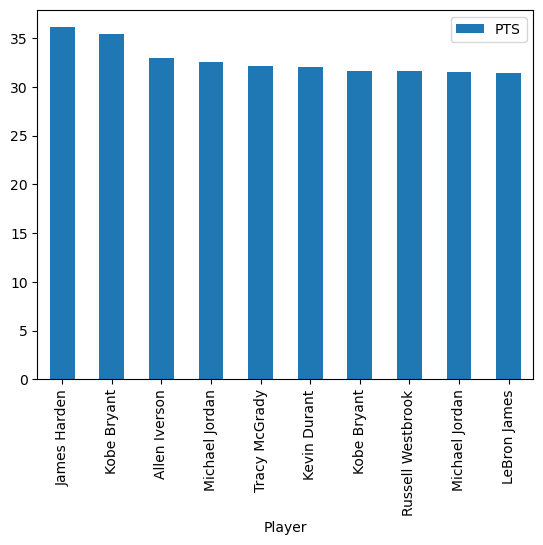

In [280]:
highest_scoring.plot.bar("Player", "PTS")

As we can see from the data, James Harden's sublime 2018/19 season ranks highest of all players in the dataset. It is, however, important to note that the dataset just contains data from the 1990/91 season as there have been some incredbile players having played the game before that season. Most noteably a guy named Wilt Chamberlain who posted a cool 50.4 points per game in his 1961/62 season ... yup 50 freaking points per game!!

Interestingly, Harden's great 2018/19 didn't earn him that seasons MVP award. That was awarded to ...

In [281]:
stats[stats["Year"] == 2019].sort_values("Share", ascending=False).head(10)[["Player", "PTS"]]

,Player,PTS
12379,Giannis Antetokounmpo,27.7
10432,James Harden,36.1
1578,Paul George,28.0
12672,Nikola Jokić,20.1
4559,Stephen Curry,27.3
3259,Damian Lillard,25.8
5994,Joel Embiid,27.5
4553,Kevin Durant,26.0
14111,Kawhi Leonard,26.6
1580,Russell Westbrook,22.9


... Giannis, having a much less efficient season scoring-wise compared to Harden. This shows that the amount of points a player scores each season is not the only factor weighing in on your chances of winning the award.

One could check the importance of each parameter by inspecting the correlation between 'Share' and the other parameters. This can be done using the `corr`-method

In [287]:
stats.corr()["Share"].sort_values(ascending=False)

Share      1.000000
Pts Won    0.994841
Pts Max    0.522100
FTA        0.324367
FT         0.318932
PTS        0.285735
2P         0.277053
FG         0.274043
2PA        0.252156
FGA        0.245803
TOV        0.233452
DRB        0.219090
AST        0.198937
TRB        0.191647
STL        0.171075
GS         0.166252
MP         0.159782
BLK        0.154790
W/L%       0.124477
W          0.120713
SRS        0.119225
ORB        0.103306
3PA        0.089353
3P         0.088733
G          0.088435
PF         0.074501
FG%        0.065300
2P%        0.059527
eFG%       0.056936
PS/G       0.038303
FT%        0.036780
Age        0.018885
3P%        0.013179
Year      -0.009369
PA/G      -0.037968
GB        -0.099232
L         -0.120178
Name: Share, dtype: float64

<AxesSubplot:>

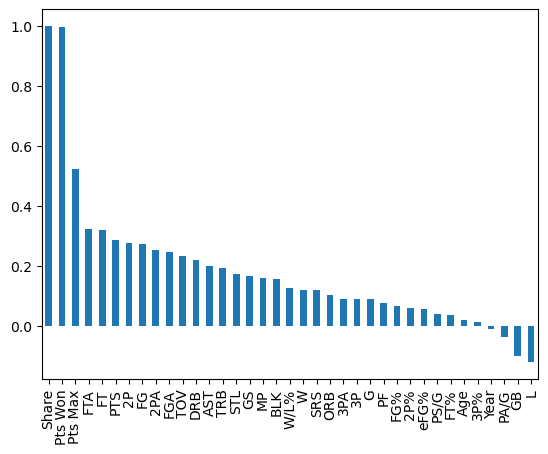

In [288]:
stats.corr()["Share"].sort_values(ascending=False).plot.bar()

Here, "Pts Won", "Pts Max" and "Share" all correlate heavily with winning the MVP award because these essentially decide who is going to win the award.

Interestingly, free throws attempted (FTA) and free throws (FT) have the highest correlation for winning the MVP. This is followed by some parameters containing data about the players scoring such as PTS, 2P, FG, 2PA and FGA. A real head-scratcher, however, is that turnovers (TOV) is ranked before assists (AST), rebounds (TRB), steals (STL) and the teams win/loss-record (W/L%). An explanation could be that the potential MVP generally has the ball in his hands most of the times and is therefore more prone to get more turnovers.

Team losses (L) seems to have a negative impact on the players chances of winning the award.

While correlation can be a useful measure for understanding the relationship between two variables, it should not be relied upon as the sole method for determining feature importance in a dataset. This is because correlation only captures linear relationships between variables (and misses non-linear relationships). This important to keep in mind and will be adressed in the next part of the project. 

Another concept factoring in in the MVP debate is something called "voter fatigue". Voter fatigue means that a player, having won the award one or two times following the current season, will be less likely win the award again despite being the "best" season of all the NBA players that year. Many reference the 2010/11 season when debating this, where Derrick Rose won the award instead of Lebron James. These are each players stats that year:

In [173]:
lebron_vs_rose = stats.loc[(stats['Player'] == 'LeBron James') | (stats['Player'] == 'Derrick Rose')]
lebron_vs_rose[lebron_vs_rose['Year'] == 2011][["Player", "PTS", "AST", "TRB", "W", "Year"]]

,Player,PTS,AST,TRB,W,Year
13220,Derrick Rose,25.0,7.7,4.1,62.0,2011
14083,LeBron James,26.7,7.0,7.5,58.0,2011


Although Lebron is one of my favorite players in the NBA, I can't see how he got robbed for the MVP-award that year based on these stats. Lebron did, however, win the award the two seasons before, as seen from the output below. Voter's fatigue might therefore have an effect and it is something to keep in mind when I will do the machine learning in the last part of this project.


In [174]:
mvp_winner = stats.groupby("Year").apply(lambda x: x.sort_values("Share", ascending=False).head(1))
mvp_winner.loc[mvp_winner['Player'] == 'LeBron James']

,,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
Year,,,,,,,,,,,,,,,,,,,,,,
2009,6059,LeBron James,SF,24.0,CLE,81.0,81.0,37.7,9.7,19.9,0.489,...,1210.0,0.969,Cleveland Cavaliers,66.0,16.0,0.805,0.0,100.3,91.4,8.68
2010,6076,LeBron James,SF,25.0,CLE,76.0,76.0,39.0,10.1,20.1,0.503,...,1230.0,0.980,Cleveland Cavaliers,61.0,21.0,0.744,0.0,102.1,95.6,6.17
2012,14096,LeBron James,SF,27.0,MIA,62.0,62.0,37.5,10.0,18.9,0.531,...,1210.0,0.888,Miami Heat,46.0,20.0,0.697,0.0,98.5,92.5,5.72
2013,14048,LeBron James,PF,28.0,MIA,76.0,76.0,37.9,10.1,17.8,0.565,...,1210.0,0.998,Miami Heat,66.0,16.0,0.805,0.0,102.9,95.0,7.03


Here, I have made a new dataframe giving me the MVP winners for each season. I did this by grouping the stats dataframe by the "Year" column, and then applying a lambda function to each group. The lambda function sorts the data within each group by the "Share" column in descending order (highest to lowest), and then selects the first row (highest share) using the `head()` method. Then, I sort out the seasons where Lebron James was the winner. 

In the next part of this project, I will continue with the "player_mvp_stats" csv file. I will use this to train a handfull of machine learning algorithms in an attempt to create a model that can predict the winner of the next MVP award.